In [1]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from imgaug import augmenters as iaa

In [2]:
dataset_path = '/home/hai/Downloads/recored_data/'

In [3]:
labels_file = json.loads(open(os.path.join('/home/hai/Downloads/recored_data/', 'key_data.json'),'r').read())
len(labels_file)

5587

In [4]:
os.chdir('/home/hai/Downloads/')

In [5]:
rgb_imgs = []
path_list = []
angle_list = []
speed_list = []
for each_sample in tqdm(labels_file, desc='Reading images'):
    rgb_img_path = os.path.join(dataset_path, 'rgb', '{}_rgb.jpg'.format(each_sample['index']))
    rgb_imgs.append(cv2.imread(rgb_img_path))
    angle_list.append(each_sample['angle'])
    speed_list.append(each_sample['speed'])
    path_list.append(rgb_img_path)
for index, each in  enumerate(path_list):
    labels_file[index]['rgb_img_path'] = each
    

Reading images: 100%|██████████| 5587/5587 [00:07<00:00, 737.79it/s]


In [6]:
labels_file

[{'angle': 0.0,
  'index': 1,
  'rgb_img_path': '/home/hai/Downloads/recored_data/rgb/1_rgb.jpg',
  'speed': 100},
 {'angle': 0.0,
  'index': 2,
  'rgb_img_path': '/home/hai/Downloads/recored_data/rgb/2_rgb.jpg',
  'speed': 100},
 {'angle': 0.0,
  'index': 3,
  'rgb_img_path': '/home/hai/Downloads/recored_data/rgb/3_rgb.jpg',
  'speed': 100},
 {'angle': 0.0,
  'index': 4,
  'rgb_img_path': '/home/hai/Downloads/recored_data/rgb/4_rgb.jpg',
  'speed': 100},
 {'angle': 0.0,
  'index': 5,
  'rgb_img_path': '/home/hai/Downloads/recored_data/rgb/5_rgb.jpg',
  'speed': 100},
 {'angle': 0.0,
  'index': 6,
  'rgb_img_path': '/home/hai/Downloads/recored_data/rgb/6_rgb.jpg',
  'speed': 100},
 {'angle': 0.0,
  'index': 7,
  'rgb_img_path': '/home/hai/Downloads/recored_data/rgb/7_rgb.jpg',
  'speed': 100},
 {'angle': 0.0,
  'index': 8,
  'rgb_img_path': '/home/hai/Downloads/recored_data/rgb/8_rgb.jpg',
  'speed': 100},
 {'angle': 0.0,
  'index': 9,
  'rgb_img_path': '/home/hai/Downloads/recored_dat

In [7]:
def show_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [8]:
augment_object = iaa.Sequential([
    iaa.Sometimes(0.5, iaa.AdditiveGaussianNoise(scale=0.03*255)),
    iaa.Sometimes(0.5, iaa.OneOf([
        iaa.GaussianBlur(sigma=0.5),
        iaa.MotionBlur(angle=(0,360))
    ])),
    iaa.GammaContrast(gamma=(0.5, 1.44)),
    iaa.Sometimes(0.3, iaa.OneOf([
        iaa.FastSnowyLandscape(lightness_threshold=(0,150)),
        iaa.Fog()
    ])),
])

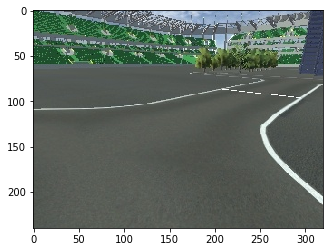

In [9]:
test_img = rgb_imgs[729]
show_img(test_img)

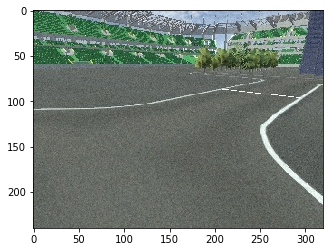

In [10]:
show_img(augment_object.augment_image(test_img))

(array([1757.,    0., 2885.,    3.,   19.,  908.,    0.,    0.,    0.,
          15.]),
 array([-60., -36., -12.,  12.,  36.,  60.,  84., 108., 132., 156., 180.]),
 <a list of 10 Patch objects>)

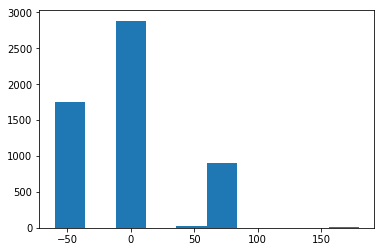

In [11]:
plt.hist(angle_list)

In [12]:
for each_sample in labels_file:
    if each_sample['speed']==0:
        labels_file.remove(each_sample)
len(labels_file)

5587

In [13]:
left = right = center = 0
for each_sample in labels_file:
    if each_sample['angle'] in range(-65,-30):
        left += 1
    elif each_sample['angle'] in range(35,65):
        right += 1
    else:
        center += 1
left, right, center

(1757, 913, 2917)

In [14]:
center/left

1.6602162777461582

In [15]:
center/right

3.1949616648411827

In [16]:
import random

In [17]:
new_sample_list = []
for index, img in tqdm(enumerate(rgb_imgs)):
    if angle_list[index] in range(-65,-30) and random.randint(0, 100) < 33:
        for index_phu in range(1):
            img = augment_object.augment_image(img)
            new_path = path_list[index].replace('.jpg','_{}.jpg'.format(index_phu))
            cv2.imwrite(new_path, img)
            new_sample = {
                'index': each_sample['index'],
                'rgb_img_path': new_path,
                'angle': angle_list[index],
                'speed': speed_list[index]
            }
            new_sample_list.append(new_sample)
final_data = new_sample_list + labels_file

5587it [00:05, 963.46it/s] 


(array([2348.,    0., 2885.,    3.,   19.,  908.,    0.,    0.,    0.,
          15.]),
 array([-60., -36., -12.,  12.,  36.,  60.,  84., 108., 132., 156., 180.]),
 <a list of 10 Patch objects>)

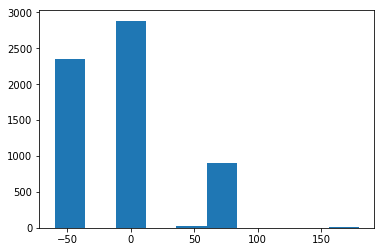

In [18]:
angle_list_temp = [each['angle'] for each in final_data]
plt.hist(angle_list_temp)

In [19]:
new_sample_list = []
for index, img in tqdm(enumerate(rgb_imgs)):
    if angle_list[index] in range(35,65):
        for index_phu in range(2):
            img = augment_object.augment_image(img)
            new_path = path_list[index].replace('.jpg','_{}.jpg'.format(index_phu))
            cv2.imwrite(new_path, img)
            new_sample = {
                'index': each_sample['index'],
                'rgb_img_path': new_path,
                'angle': angle_list[index],
                'speed': speed_list[index]
            }
            new_sample_list.append(new_sample)
final_data = final_data + new_sample_list

5587it [00:18, 298.47it/s]


In [20]:
with open(os.path.join(dataset_path, 'over_sampled_label.json'), 'w', encoding='utf-8') as outfile:
    json.dump(final_data, outfile, ensure_ascii=False,
              sort_keys=False, indent=4)
    outfile.write("\n")

In [21]:
len(final_data)

8004